In [6]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Opening the files about data
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

# normalizing data (a pixel goes from 0 to 255)
# X = X/255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the model
model = Sequential()
# 3 convolutional layers
model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# The output layer with 4 neurons, for 4 classes
model.add(Dense(14))
model.add(Activation("softmax"))

# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Training the model, with 20 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1)

Train on 10080 samples, validate on 1121 samples
Epoch 1/20
10080/10080 [==============================] - 6s 623us/sample - loss: 3.2825 - acc: 0.0852 - val_loss: 2.5983 - val_acc: 0.0981
Epoch 2/20
10080/10080 [==============================] - 6s 609us/sample - loss: 2.3760 - acc: 0.2245 - val_loss: 1.7440 - val_acc: 0.4184
Epoch 3/20
10080/10080 [==============================] - 6s 613us/sample - loss: 1.5715 - acc: 0.4859 - val_loss: 1.0640 - val_acc: 0.6887
Epoch 4/20
10080/10080 [==============================] - 6s 602us/sample - loss: 1.1191 - acc: 0.6570 - val_loss: 0.7856 - val_acc: 0.7663
Epoch 5/20
10080/10080 [==============================] - 6s 585us/sample - loss: 0.8862 - acc: 0.7354 - val_loss: 0.6952 - val_acc: 0.7948
Epoch 6/20
10080/10080 [==============================] - 6s 631us/sample - loss: 0.7539 - acc: 0.7765 - val_loss: 0.6854 - val_acc: 0.7877
Epoch 7/20
10080/10080 [==============================] - 7s 646us/sample - loss: 0.6855 - acc: 0.7997 - val_lo

Saved model to disk
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


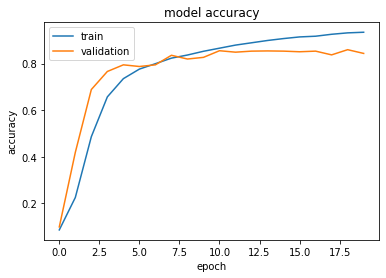

In [7]:
# Saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file :
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('kerasmodel.h5')

# Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


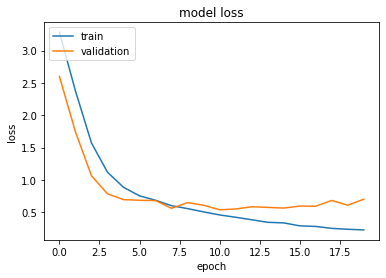

In [8]:
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_6 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
activation_7 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)         

In [10]:
print('\n# Evaluate on test data')
results = model.evaluate(X_test, y_test, batch_size=32)
print('test loss, test acc:', results)



# Evaluate on test data
2801/2801 [==============================] - 1s 206us/sample - loss: 0.6420 - acc: 0.8508
test loss, test acc: [0.6420080931814004, 0.8507676]
